## Alex Julian Sami Marquez

In [1]:
import pandas as pd
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import seaborn as sns

d:\DIPLOMADO\Taller\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
data = pd.read_csv('data/user_loggedin_teacher.csv',delimiter = ',')
data

,Unnamed: 0,id,department,timecreated,rol,userid
0,121884,552,Departamento De Español y Literatura,1709549942,editingteacher,fa5d171c9280388b26a2569e9fccc7683ab3ec70b685b3...
1,121885,319,Departamento De Informática Educativa,1709551598,editingteacher,6620b5d17f18eed1eb4d2d1cf4d7fe20c1dc49f0d6605d...
2,121886,568,Departamento de Salud Pública,1709551692,editingteacher,eca7bf3a91ac9f5b18f1bc05d3c44326c4a70f9d746a1b...
3,121887,29,NaN,1709555966,editingteacher,d6fccd5d02351b1c921506167eb6bd49e8203158ddd342...
4,121888,366,Dpto De Ciencias Naturales,1709556334,editingteacher,9a94168caabfa08ab2e00e84ccae436d30338af9eedc28...
...,...,...,...,...,...,...
18944,459318,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1713366104,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...
18945,459321,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1713367124,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...
18946,459700,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1713827512,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...
18947,459956,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1714218380,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18949 entries, 0 to 18948
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18949 non-null  int64 
 1   id           18949 non-null  int64 
 2   department   17846 non-null  object
 3   timecreated  18949 non-null  int64 
 4   rol          18949 non-null  object
 5   userid       18949 non-null  object
dtypes: int64(3), object(3)
memory usage: 888.4+ KB


In [5]:
data['fecha_convertida'] = pd.to_datetime(data['timecreated'], unit='s')
data

,Unnamed: 0,id,department,timecreated,rol,userid,fecha_convertida
0,121884,552,Departamento De Español y Literatura,1709549942,editingteacher,fa5d171c9280388b26a2569e9fccc7683ab3ec70b685b3...,2024-03-04 10:59:02
1,121885,319,Departamento De Informática Educativa,1709551598,editingteacher,6620b5d17f18eed1eb4d2d1cf4d7fe20c1dc49f0d6605d...,2024-03-04 11:26:38
2,121886,568,Departamento de Salud Pública,1709551692,editingteacher,eca7bf3a91ac9f5b18f1bc05d3c44326c4a70f9d746a1b...,2024-03-04 11:28:12
3,121887,29,NaN,1709555966,editingteacher,d6fccd5d02351b1c921506167eb6bd49e8203158ddd342...,2024-03-04 12:39:26
4,121888,366,Dpto De Ciencias Naturales,1709556334,editingteacher,9a94168caabfa08ab2e00e84ccae436d30338af9eedc28...,2024-03-04 12:45:34
...,...,...,...,...,...,...,...
18944,459318,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1713366104,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...,2024-04-17 15:01:44
18945,459321,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1713367124,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...,2024-04-17 15:18:44
18946,459700,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1713827512,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...,2024-04-22 23:11:52
18947,459956,16465,DEPARTAMENTO DE FISICA Y ELECTRONICA D P,1714218380,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...,2024-04-27 11:46:20


In [7]:
data.describe()

,Unnamed: 0,id,timecreated,fecha_convertida
count,18949.000000,18949.000000,1.894900e+04,18949
mean,151671.932345,3868.424138,1.715789e+09,2024-05-15 16:05:50.495329536
min,121884.000000,5.000000,1.709550e+09,2024-03-04 10:59:02
25%,129389.000000,237.000000,1.713375e+09,2024-04-17 17:28:35
50%,136707.000000,536.000000,1.715954e+09,2024-05-17 13:59:18
75%,150699.000000,778.000000,1.718206e+09,2024-06-12 15:20:29
max,460426.000000,19342.000000,1.722143e+09,2024-07-28 04:55:24
std,41148.624568,6160.834884,3.089825e+06,NaN


In [8]:
(data['department'].unique())


array(['Departamento De Español y Literatura',
       'Departamento De Informática Educativa',
       'Departamento de Salud Pública', nan, 'Dpto De Ciencias Naturales',
       'Departamento De Ciencias Jurídicas',
       'Departamento De Ingeniería Industrial',
       'Dpto De Ing Agronómica Y Desarroll Rural',
       'Dpto Ciencias Administrativas', 'Departamento De Enfermería',
       'Departamento De Idiomas Extranjeros', 'Departamento De Química',
       'Dpto De Ing De Sistemas Y Telecomunicaci',
       'Departamento De Matemáticas Y Estadístic',
       'Departamento de Regencía Y Farmacia', 'Departamento De Biología',
       'Departamento de Psicopedagogía', 'Dpto De Ingeniería Ambiental',
       'Dpto De Cultura Física, Recreac Y Deport',
       'Departamento De Ciencias Pecuarías',
       'Departamento De Geografía Y Medio Ambien',
       'Departamento De Bacteriología',
       'Departamento de Física y Electrónica', ' Ingeniería Mecánica',
       'ENFERMERÍA', 'Departamento D

## 1. Clear the Department column

In [ ]:
department_correct = ['Departamento De Informática Educativa','Departamento De Ciencias Jurídicas','Departamento De Salud Pública','Departamento De Ingeniería Industrial',
                      'Departamento De Enfermería','Departamento De Regencía Y Farmacia','Departamento De Biología','Departamento De Bacteriología','Departamento De Física y Electrónica',
                      'Departamento De Ciencias Sociales','Departamento De Ingeniería Mecánica','Departamento De Ciencias Agrícolas','Departamento De Ingeniería De Alimentos',
                      'Departamento De Ingeniería De Sistemas Y Telecomunicaciones','Departamento De Ingeniería Agronómica Y Desarrollo Rural','Departamento De Matemáticas Y Estadística',
                      'Departamento De Idiomas Extranjeros','Departamento De Psicopedagogía','Departamento De Cultura Física, Recreación Y Deporte','Departamento De Ciencias Pecuarías',
                      'Departamento De Geografía Y Medio Ambiente','Departamento De Licenciatura En Informática','Departamento De Administración En Salud','Departamento De Español y Literatura',
                      'Departamento De Ciencias Administrativas'
                      ]

data['department'] = data['department'].fillna("NaN").astype(str)

def corregir_departamento(depto):
   
    nombre_cercano = process.extractOne(depto, department_correct)
    
    if nombre_cercano[1] > 80:
        return nombre_cercano[0]
    else:
        return depto
    

data['department'] = data['department'].apply(corregir_departamento)


data.to_csv('data/dataset_actualizado.csv', index=False)

print("Corrección de departamentos completada y guardada en dataset_actualizado.csv")

Corrección de departamentos completada y guardada en dataset_actualizado.csv


In [3]:
data_ac = pd.read_csv('data/dataset_actualizado.csv',delimiter = ',')
data_ac

,Unnamed: 0,id,department,timecreated,rol,userid,fecha_convertida
0,121884,552,Departamento De Español y Literatura,1709549942,editingteacher,fa5d171c9280388b26a2569e9fccc7683ab3ec70b685b3...,2024-03-04 10:59:02
1,121885,319,Departamento De Informática Educativa,1709551598,editingteacher,6620b5d17f18eed1eb4d2d1cf4d7fe20c1dc49f0d6605d...,2024-03-04 11:26:38
2,121886,568,Departamento De Salud Pública,1709551692,editingteacher,eca7bf3a91ac9f5b18f1bc05d3c44326c4a70f9d746a1b...,2024-03-04 11:28:12
3,121887,29,NaN,1709555966,editingteacher,d6fccd5d02351b1c921506167eb6bd49e8203158ddd342...,2024-03-04 12:39:26
4,121888,366,Departamento De Ingeniería De Sistemas Y Telec...,1709556334,editingteacher,9a94168caabfa08ab2e00e84ccae436d30338af9eedc28...,2024-03-04 12:45:34
...,...,...,...,...,...,...,...
18944,459318,16465,Departamento De Física y Electrónica,1713366104,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...,2024-04-17 15:01:44
18945,459321,16465,Departamento De Física y Electrónica,1713367124,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...,2024-04-17 15:18:44
18946,459700,16465,Departamento De Física y Electrónica,1713827512,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...,2024-04-22 23:11:52
18947,459956,16465,Departamento De Física y Electrónica,1714218380,editingteacher,1ba19ebd2a8fa609b7beb085d0b7f30f0e262859b475f8...,2024-04-27 11:46:20


In [3]:
(data_ac['department'].unique())

array(['Departamento De Español y Literatura',
       'Departamento De Informática Educativa',
       'Departamento De Salud Pública', nan,
       'Departamento De Ingeniería De Sistemas Y Telecomunicaciones',
       'Departamento De Ciencias Jurídicas',
       'Departamento De Ingeniería Industrial',
       'Departamento De Enfermería',
       'Departamento De Ciencias Administrativas',
       'Departamento De Idiomas Extranjeros',
       'Departamento De Matemáticas Y Estadística',
       'Departamento De Regencía Y Farmacia', 'Departamento De Biología',
       'Departamento De Psicopedagogía',
       'Departamento De Cultura Física, Recreación Y Deporte',
       'Departamento De Ciencias Pecuarías',
       'Departamento De Geografía Y Medio Ambiente',
       'Departamento De Bacteriología',
       'Departamento De Física y Electrónica',
       'Departamento De Ingeniería Mecánica',
       'Departamento De Ciencias Sociales',
       'Departamento De Ciencias Agrícolas',
       'Depar

## 2. Show total login by department and bar graph

Inicio de sesión total por departamento:
department
Departamento De Salud Pública                                  2957
Departamento De Informática Educativa                          2399
Departamento De Ciencias Administrativas                       1983
Departamento De Enfermería                                     1816
nan                                                            1103
Departamento De Psicopedagogía                                  958
Departamento De Ingeniería Industrial                           924
Departamento De Biología                                        725
Departamento De Ingeniería De Sistemas Y Telecomunicaciones     719
Departamento De Idiomas Extranjeros                             715
Departamento De Matemáticas Y Estadística                       698
Departamento De Bacteriología                                   668
Departamento De Geografía Y Medio Ambiente                      637
Departamento De Ingeniería De Alimentos                         

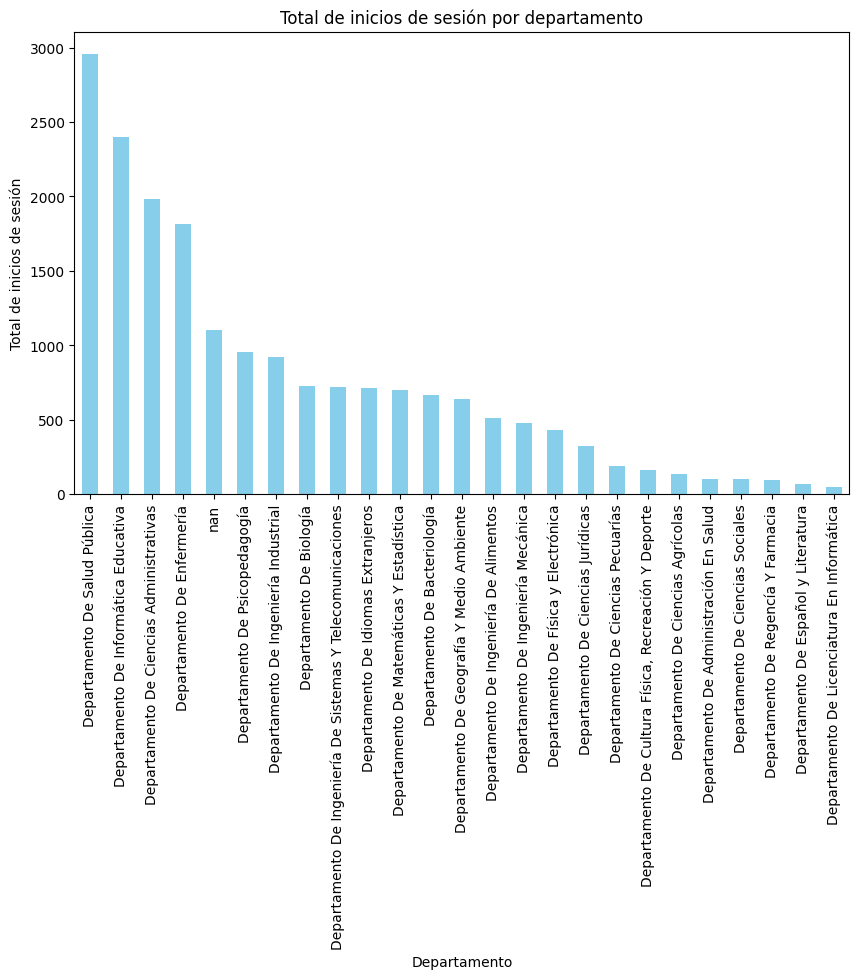

In [ ]:
data_ac = pd.read_csv('data/dataset_actualizado.csv', delimiter=',')

data_ac['department'] = data_ac['department'].astype(str)

inicio_sesion_por_departamento = data_ac['department'].value_counts()

print("Inicio de sesión total por departamento:")
print(inicio_sesion_por_departamento)

plt.figure(figsize=(10, 6))
inicio_sesion_por_departamento.plot(kind='bar', color='skyblue')
plt.title("Total de inicios de sesión por departamento")
plt.xlabel("Departamento")
plt.ylabel("Total de inicios de sesión")
plt.xticks(rotation=90)  
plt.show()

## 3. Display the total number of logins per teacher in a specific program

In [29]:
programa_especifico = "Departamento De Bacteriología"

data_programa = data_ac[data_ac['department'] == programa_especifico]

inicios_por_profesor = data_programa['rol'].value_counts()

inicio_sesion_por_departamento

print(f"Inicio de sesión total por profesor en el '{programa_especifico}':")
inicios_por_profesor

Inicio de sesión total por profesor en el 'Departamento De Bacteriología':


rol
editingteacher    668
Name: count, dtype: int64

## 4. Login bar graph by department

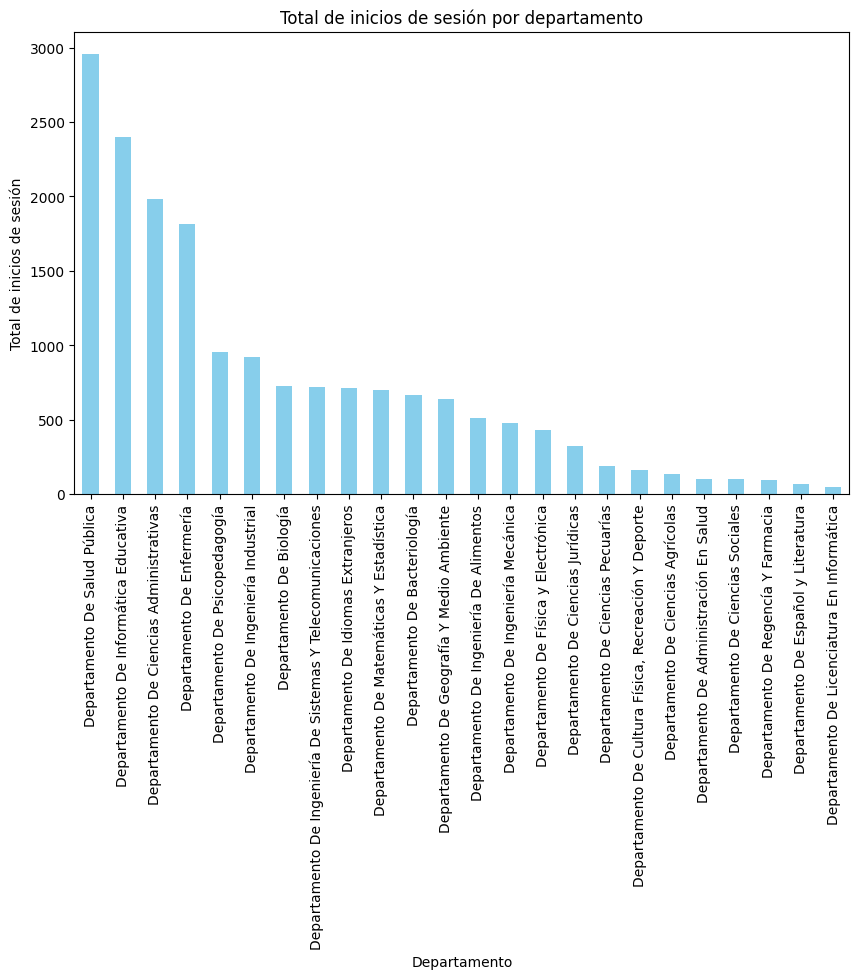

In [22]:
inicios_por_departamento = data_ac['department'].value_counts()

plt.figure(figsize=(10, 6))
inicios_por_departamento.plot(kind='bar', color='skyblue')
plt.title("Total de inicios de sesión por departamento")
plt.xlabel("Departamento")
plt.ylabel("Total de inicios de sesión")
plt.xticks(rotation=90)  
plt.show()

## 5. Login boxplot graph by department

<Figure size 1500x800 with 0 Axes>

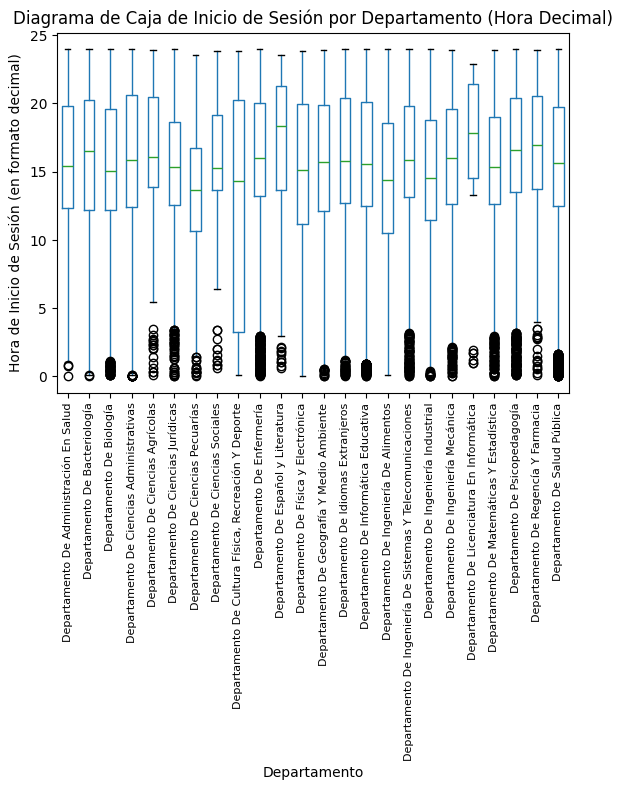

In [14]:
data_ac['fecha_convertida'] = pd.to_datetime(data_ac['fecha_convertida'], errors='coerce')

data_ac['hora_decimal'] = data_ac['fecha_convertida'].dt.hour + \
                          data_ac['fecha_convertida'].dt.minute / 60 + \
                          data_ac['fecha_convertida'].dt.second / 3600

plt.figure(figsize=(15, 8))
data_ac.boxplot(column='hora_decimal', by='department', grid=False)
plt.title('Diagrama de Caja de Inicio de Sesión por Departamento (Hora Decimal)')
plt.suptitle('')
plt.xlabel('Departamento')
plt.ylabel('Hora de Inicio de Sesión (en formato decimal)')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.show()

## 6. Login average by department

In [17]:
promedio = data_ac.groupby('department')['hora_decimal'].mean()
promedio

department
Departamento De Administración En Salud                        15.014018
Departamento De Bacteriología                                  14.783896
Departamento De Biología                                       14.153096
Departamento De Ciencias Administrativas                       14.834814
Departamento De Ciencias Agrícolas                             15.695994
Departamento De Ciencias Jurídicas                             14.353298
Departamento De Ciencias Pecuarías                             12.721049
Departamento De Ciencias Sociales                              14.914219
Departamento De Cultura Física, Recreación Y Deporte           12.896225
Departamento De Enfermería                                     15.423891
Departamento De Español y Literatura                           15.516679
Departamento De Física y Electrónica                           13.901459
Departamento De Geografía Y Medio Ambiente                     14.660242
Departamento De Idiomas Extranjeros     

## 7. Quartiles of teachers by department

In [ ]:
cuartiles = data_ac.groupby('department')['id'].quantile([0.25, 0.5, 0.75]).unstack()
cuartiles.columns = ['Q1', 'Q2 (Mediana)', 'Q3']
cuartiles

,Q1,Q2 (Mediana),Q3
department,,,
Departamento De Administración En Salud,11790.00,14427.0,14427.0
Departamento De Bacteriología,638.00,664.0,691.0
Departamento De Biología,332.00,545.0,564.0
Departamento De Ciencias Administrativas,214.00,235.0,245.0
Departamento De Ciencias Agrícolas,261.00,261.0,267.0
Departamento De Ciencias Jurídicas,446.00,706.0,11784.0
Departamento De Ciencias Pecuarías,161.00,167.0,180.0
Departamento De Ciencias Sociales,11773.00,11778.0,11779.0
"Departamento De Cultura Física, Recreación Y Deporte",373.00,378.0,385.0
